In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data", header=None) 
data.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [95]:
data.columns = ["Sex","Length","Diameter","Height","Whole weight","Shucked weight","Viscera weight","Shell weight","Rings"]
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [43]:
data.drop('Sex', axis='columns', inplace=True)
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
data = data.sample(frac=1)
X = np.array(data.iloc[ : , :7])
y = np.array(data['Rings'])

In [ ]:
cut = round(len(y) * .8)
x_train = X[ :cut]
y_train = y[ :cut]
x_test = X[cut: ]
y_test = y[cut: ]

In [73]:
from my_knn import KNearestNeighbors

In [93]:
accs = []
for k in [1, 3, 5, 7, 9, 11, 13, 15, 29, 35, 40, 50, 60, 80, 100]:
    knn = KNearestNeighbors(k)
    knn.fit(x_train, y_train)
    accs.append(knn.evaluate(x_test, y_test))
accs

[0.21077844311377245,
 0.2215568862275449,
 0.23233532934131737,
 0.23952095808383234,
 0.25988023952095807,
 0.2694610778443114,
 0.2718562874251497,
 0.2622754491017964,
 0.28502994011976046,
 0.288622754491018,
 0.2838323353293413,
 0.2754491017964072,
 0.29820359281437125,
 0.2622754491017964,
 0.2718562874251497]

Text(0, 0.5, 'accuracy')

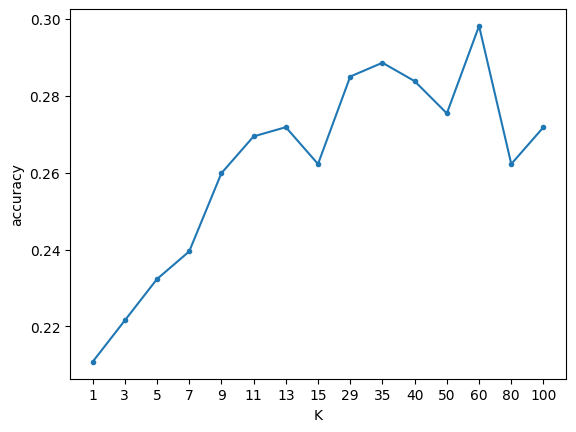

In [97]:
plt.plot(np.array([1, 3, 5, 7, 9, 11, 13, 15, 29, 35, 40, 50, 60, 80, 100], str), accs, marker='o', markersize= 3)
plt.xlabel('K')
plt.ylabel('accuracy')